### Прогноз размещения на площадке (отрасли + суммы) 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#Немоного изменим параметры вывода графиков
rcParams['figure.figsize'] = 18,10

In [3]:
data = pd.read_excel('ОтраслиСуммы.xlsx')
data.head()

,RegCode,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36
0,1,27320121.55,2.239793e+08,4.526754e+08,2.772571e+08,4.075397e+08,6.491627e+08,3.217444e+08,2.978870e+08,4.362747e+08,...,5.019957e+08,4.176194e+08,7.150895e+08,9.263281e+08,4.637594e+08,4.750847e+08,5.614511e+08,7.344211e+07,0.0,0.0
1,2,1638624.67,3.193716e+07,1.678301e+08,9.308948e+07,1.464365e+08,8.683873e+07,4.090291e+07,8.937926e+07,2.969357e+08,...,1.411818e+08,3.615117e+08,3.220894e+08,1.071800e+08,5.606216e+07,9.891568e+07,4.964855e+07,4.262470e+07,0.0,0.0
2,3,1385062.27,9.319539e+06,1.551933e+07,1.371921e+07,3.346866e+07,1.076291e+07,5.586143e+07,1.041692e+07,1.098540e+07,...,1.044013e+07,9.468551e+06,5.419316e+07,8.239200e+06,2.739518e+06,4.360990e+06,8.379004e+06,1.910532e+05,0.0,0.0
3,5,12863618.93,9.616093e+08,6.328118e+07,6.051805e+07,5.810905e+07,1.472801e+09,1.795843e+08,2.414438e+08,1.406599e+08,...,5.005690e+08,3.689001e+08,1.457786e+09,4.211242e+08,1.088818e+09,1.962721e+09,5.429830e+08,2.712733e+08,0.0,0.0
4,6,0.00,2.538600e+05,1.795672e+07,6.043860e+05,7.324000e+04,5.047837e+06,2.039846e+06,1.075900e+06,1.744919e+07,...,4.301167e+08,1.191977e+08,8.272586e+07,1.985618e+08,4.080814e+07,4.059310e+07,3.003602e+06,1.506026e+07,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 37 columns):
RegCode    88 non-null int64
M1         88 non-null float64
M2         88 non-null float64
M3         88 non-null float64
M4         88 non-null float64
M5         88 non-null float64
M6         88 non-null float64
M7         88 non-null float64
M8         88 non-null float64
M9         88 non-null float64
M10        88 non-null float64
M11        88 non-null float64
M12        88 non-null float64
M13        88 non-null float64
M14        88 non-null float64
M15        88 non-null float64
M16        88 non-null float64
M17        88 non-null float64
M18        88 non-null float64
M19        88 non-null float64
M20        88 non-null float64
M21        88 non-null float64
M22        88 non-null float64
M23        88 non-null float64
M24        88 non-null float64
M25        88 non-null float64
M26        88 non-null float64
M27        88 non-null float64
M28        88 non-null float64


In [5]:
melt = data.melt(id_vars='RegCode', var_name='Month', value_name='Proc')

melt['Month'] = melt['Month'].str.extract('(\d+)', expand=False).astype(int)

melt = melt.sort_values(['RegCode', 'Month'])
melt.head()

,RegCode,Month,Proc
0,1,1,2.732012e+07
88,1,2,2.239793e+08
176,1,3,4.526754e+08
264,1,4,2.772571e+08
352,1,5,4.075397e+08


In [6]:
month_start=29
month_end=34
s='Procedures ('Months '+str(month_start)+ ' - '+str(month_end)+ ')'

In [7]:
import copy

In [8]:
melt2 =  melt.copy()
melt2['Last_Month_Proc'] = melt2.groupby(['RegCode'])['Proc'].shift()
melt2['Last_Month_Diff'] = melt2.groupby(['RegCode'])['Last_Month_Proc'].diff()
melt2 = melt2.dropna()
melt2.head()

,RegCode,Month,Proc,Last_Month_Proc,Last_Month_Diff
176,1,3,4.526754e+08,2.239793e+08,1.966592e+08
264,1,4,2.772571e+08,4.526754e+08,2.286960e+08
352,1,5,4.075397e+08,2.772571e+08,-1.754183e+08
440,1,6,6.491627e+08,4.075397e+08,1.302827e+08
528,1,7,3.217444e+08,6.491627e+08,2.416230e+08


In [9]:
procedures = []
for Month in range(0, month_start):
    val=melt[melt['Month'] == Month]
    total=sum(val['Proc'])
    procedures.append(total)

In [10]:
proceduresAll = []
for Month in range(0,month_end):
    val=melt[melt['Month'] == Month]
    total=sum(val['Proc'])
    proceduresAll.append(total)

In [11]:
melt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 176 to 3167
Data columns (total 5 columns):
RegCode            2992 non-null int64
Month              2992 non-null int32
Proc               2992 non-null float64
Last_Month_Proc    2992 non-null float64
Last_Month_Diff    2992 non-null float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 128.6 KB


In [12]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [13]:
%%time
mean_errorB = []
total_errorB = []
ProcB = copy.copy(procedures)
predict_ProcB = copy.copy(procedures)
abs_pr_errorB = []
for Month in range(month_start, month_end):
    train = melt2[melt2['Month'] < Month]
    val = melt2[melt2['Month'] == Month]
    yts=val['Proc']
    
    p = val['Last_Month_Proc'].values
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (Month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorB.append(error)
    total_errorB.append(abs_error)
    ProcB.append(total_yts)
    predict_ProcB.append(total_p)
    abs_pr_errorB.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorB))
print('Mean Abs Error = %.5f' % np.mean(total_errorB))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorB))

Month 29 - Error 2.34881, Real Total 170517288029.3 - Predict Total 133159940682.1, Abs Error 37357347347.2, Persent - 21.9
Month 30 - Error 2.32541, Real Total 138610185794.3 - Predict Total 170517288029.3, Abs Error 31907102235.0, Persent - 23.0
Month 31 - Error 2.32338, Real Total 114863526233.8 - Predict Total 138610185794.3, Abs Error 23746659560.5, Persent - 20.7
Month 32 - Error 1.48683, Real Total 132186973999.4 - Predict Total 114863526233.8, Abs Error 17323447765.6, Persent - 13.1
Month 33 - Error 2.75025, Real Total 121359958523.1 - Predict Total 132186973999.4, Abs Error 10827015476.2, Persent - 8.9
Mean Error = 2.24694
Mean Abs Error = 24232314476.90402
Mean Abs Error persent = 17.52560
Wall time: 15 ms


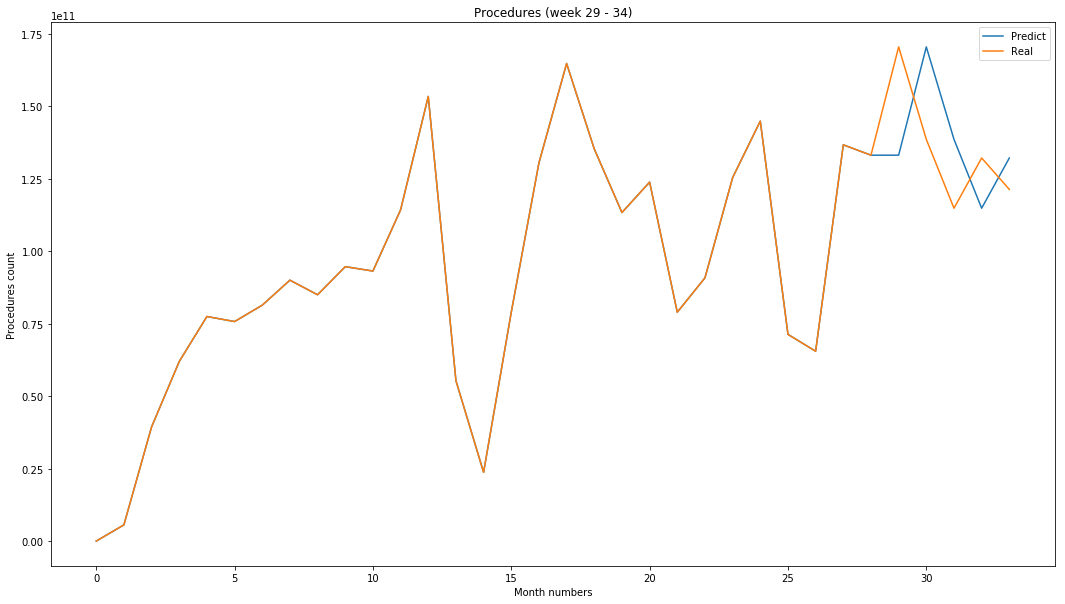

In [14]:

plt.plot(predict_ProcB)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

(20000000000, 200000000000)

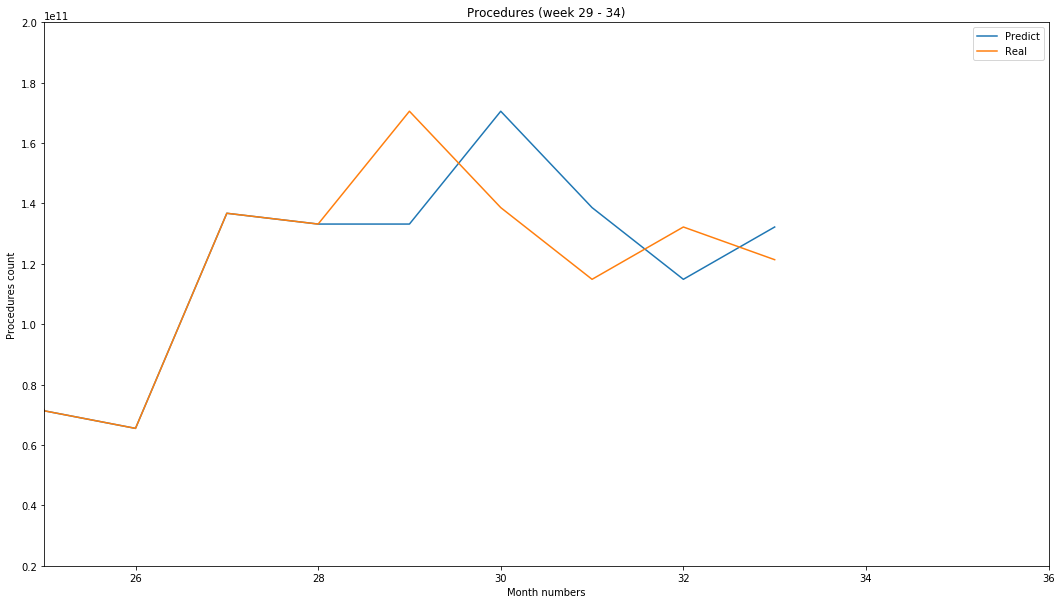

In [15]:
plt.plot(predict_ProcB)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))
plt.xlim(25, 36)
plt.ylim(20000000000, 200000000000)

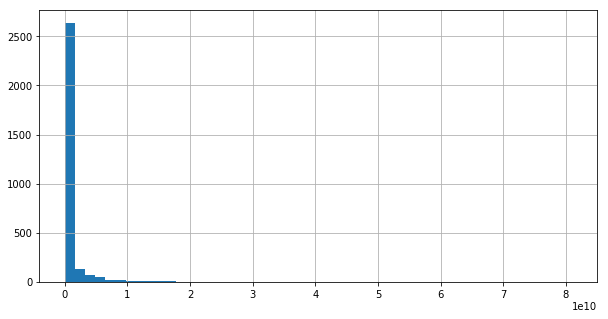

In [16]:
melt2['Proc'].hist(bins=50, figsize=(10,5))

In [17]:
%%time
mean_error2 = []
total_error2 = []
Proc2 = copy.copy(procedures)
predict_Proc2 = copy.copy(procedures)
abs_pr_error2 = []
for Month in range(month_start, month_end):
    train = melt2[melt2['Month'] < Month]
    val = melt2[melt2['Month'] == Month]

    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (Month, error, total_yts, total_p, abs_error, abs_pr))
    mean_error2.append(error)
    total_error2.append(abs_error)
    Proc2.append(total_yts)
    predict_Proc2.append(total_p)
    abs_pr_error2.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_error2))
print('Mean Abs Error = %.5f' % np.mean(total_error2))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_error2))

Month 29 - Error 4.40026, Real Total 170517288029.3 - Predict Total 132344580938.3, Abs Error 38172707091.0, Persent - 22.4
Month 30 - Error 4.50958, Real Total 138610185794.3 - Predict Total 172535095730.7, Abs Error 33924909936.4, Persent - 24.5
Month 31 - Error 4.55263, Real Total 114863526233.8 - Predict Total 139301234854.4, Abs Error 24437708620.6, Persent - 21.3
Month 32 - Error 4.79298, Real Total 132186973999.4 - Predict Total 114718346996.0, Abs Error 17468627003.4, Persent - 13.2
Month 33 - Error 5.43486, Real Total 121359958523.1 - Predict Total 131499752901.8, Abs Error 10139794378.7, Persent - 8.4
Mean Error = 4.73806
Mean Abs Error = 24828749406.01461
Mean Abs Error persent = 17.94142
Wall time: 40 ms


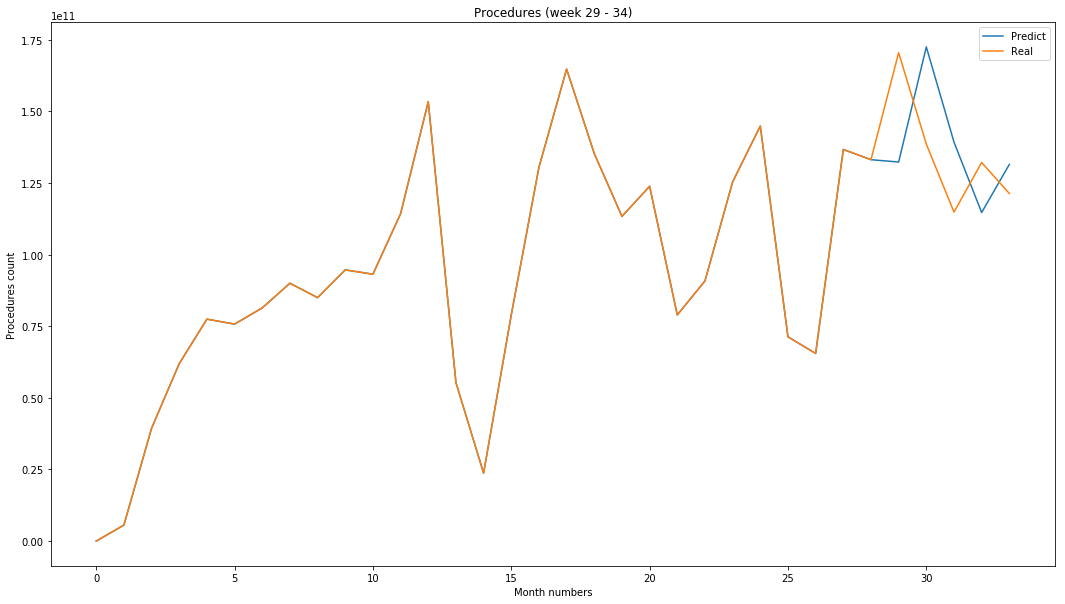

In [18]:

plt.plot(predict_Proc2)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [19]:
%%time
mean_errorRF2 = []
total_errorRF2 = []
ProcRF2 = copy.copy(procedures)
predict_ProcRF2 = copy.copy(procedures)
abs_pr_errorRF2 = []
for month in range(month_start, month_end):
    train = melt2[melt2['Month'] < month]
    val = melt2[melt2['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF2.append(error)
    total_errorRF2.append(abs_error)
    ProcRF2.append(total_yts)
    predict_ProcRF2.append(total_p)
    abs_pr_errorRF2.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF2))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF2))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF2))

Month 29 - Error 3.20894, Real Total 170517288029.3 - Predict Total 139580025488.2, Abs Error 30937262541.1, Persent - 18.1
Month 30 - Error 3.18984, Real Total 138610185794.3 - Predict Total 223316927852.7, Abs Error 84706742058.4, Persent - 61.1
Month 31 - Error 3.10129, Real Total 114863526233.8 - Predict Total 151927051201.9, Abs Error 37063524968.1, Persent - 32.3
Month 32 - Error 2.91604, Real Total 132186973999.4 - Predict Total 113989954559.4, Abs Error 18197019440.0, Persent - 13.8
Month 33 - Error 4.00751, Real Total 121359958523.1 - Predict Total 139547454648.8, Abs Error 18187496125.7, Persent - 15.0
Mean Error = 3.28472
Mean Abs Error = 37818409026.65644
Mean Abs Error persent = 28.05493
Wall time: 21.4 s


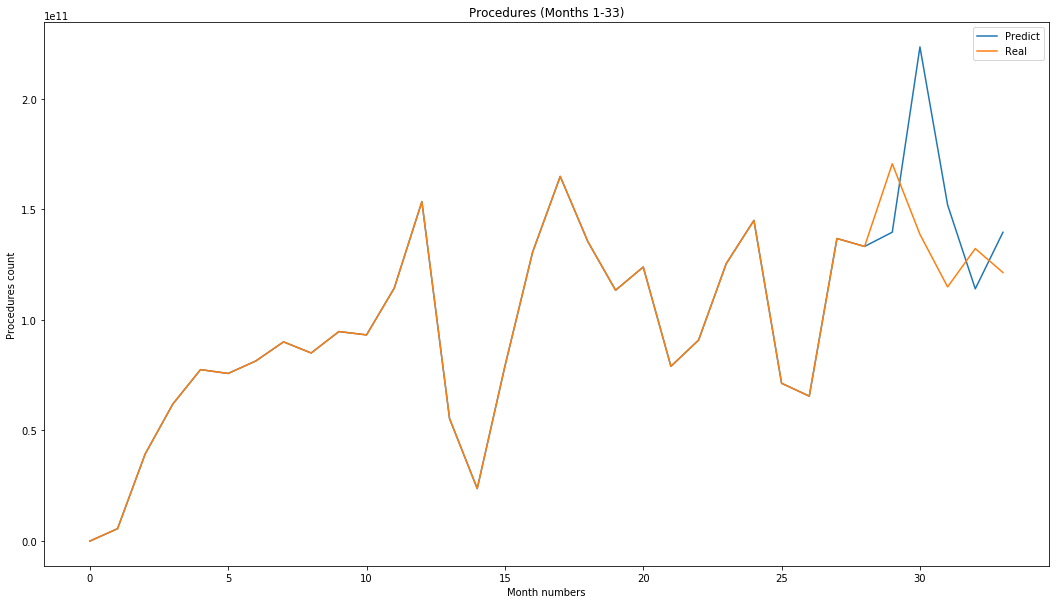

In [20]:

plt.plot(predict_ProcRF2)
#plt.plot(ProcRF2)
plt.plot(proceduresAll)
plt.title('Procedures (Months 1-33)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [21]:
melt3 = melt.copy()
melt3['Last_Month_Proc'] = melt3.groupby(['RegCode'])['Proc'].shift()
melt3['Last_Month_Diff'] = melt3.groupby(['RegCode'])['Last_Month_Proc'].diff()
melt3['Last-1_Month_Proc'] = melt3.groupby(['RegCode'])['Proc'].shift(2)
melt3['Last-1_Month_Diff'] = melt3.groupby(['RegCode'])['Last-1_Month_Proc'].diff()
melt3 = melt3.dropna()
melt3.head()

,RegCode,Month,Proc,Last_Month_Proc,Last_Month_Diff,Last-1_Month_Proc,Last-1_Month_Diff
264,1,4,2.772571e+08,4.526754e+08,2.286960e+08,2.239793e+08,1.966592e+08
352,1,5,4.075397e+08,2.772571e+08,-1.754183e+08,4.526754e+08,2.286960e+08
440,1,6,6.491627e+08,4.075397e+08,1.302827e+08,2.772571e+08,-1.754183e+08
528,1,7,3.217444e+08,6.491627e+08,2.416230e+08,4.075397e+08,1.302827e+08
616,1,8,2.978870e+08,3.217444e+08,-3.274184e+08,6.491627e+08,2.416230e+08


In [22]:
%%time
mean_errorRF3 = []
total_errorRF3 = []
ProcRF3 = copy.copy(procedures)
predict_ProcRF3 = copy.copy(procedures)
abs_pr_errorRF3 = []
for month in range(month_start, month_end):
    train = melt3[melt3['Month'] < month]
    val = melt3[melt3['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF3.append(error)
    total_errorRF3.append(abs_error)
    ProcRF3.append(total_yts)
    predict_ProcRF3.append(total_p)
    abs_pr_errorRF3.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF3))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF3))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF3))

Month 29 - Error 3.31195, Real Total 170517288029.3 - Predict Total 123600376329.1, Abs Error 46916911700.2, Persent - 27.5
Month 30 - Error 3.07903, Real Total 138610185794.3 - Predict Total 210349639240.3, Abs Error 71739453446.0, Persent - 51.8
Month 31 - Error 3.12279, Real Total 114863526233.8 - Predict Total 151612791433.0, Abs Error 36749265199.2, Persent - 32.0
Month 32 - Error 3.12636, Real Total 132186973999.4 - Predict Total 118454153344.1, Abs Error 13732820655.3, Persent - 10.4
Month 33 - Error 3.95839, Real Total 121359958523.1 - Predict Total 131925768320.1, Abs Error 10565809797.0, Persent - 8.7
Mean Error = 3.31971
Mean Abs Error = 35940852159.53587
Mean Abs Error persent = 26.07194
Wall time: 29.2 s


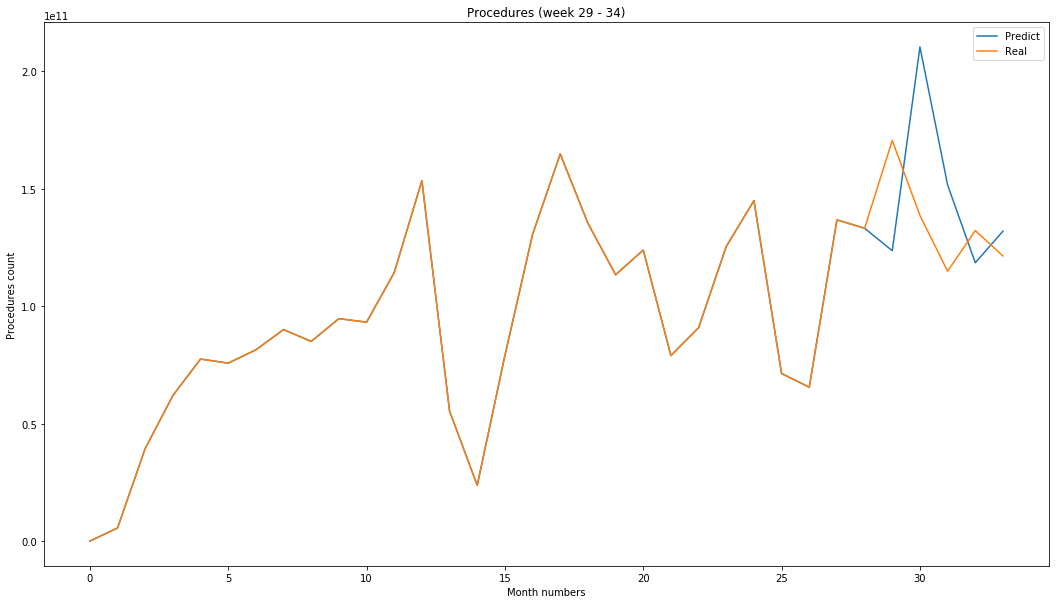

In [23]:

plt.plot(predict_ProcRF3)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [24]:
melt4 = melt.copy()
melt4['Last_Month_Proc'] = melt4.groupby(['RegCode'])['Proc'].shift()
melt4['Last_Month_Diff'] = melt4.groupby(['RegCode'])['Last_Month_Proc'].diff()
melt4['Last-1_Month_Proc'] = melt4.groupby(['RegCode'])['Proc'].shift(2)
melt4['Last-1_Month_Diff'] = melt4.groupby(['RegCode'])['Last-1_Month_Proc'].diff()
melt4['Last-2_Month_Proc'] = melt4.groupby(['RegCode'])['Proc'].shift(3)
melt4['Last-2_Month_Diff'] = melt4.groupby(['RegCode'])['Last-2_Month_Proc'].diff()
melt4 = melt4.dropna()
melt4.head()

,RegCode,Month,Proc,Last_Month_Proc,Last_Month_Diff,Last-1_Month_Proc,Last-1_Month_Diff,Last-2_Month_Proc,Last-2_Month_Diff
352,1,5,4.075397e+08,2.772571e+08,-1.754183e+08,4.526754e+08,2.286960e+08,2.239793e+08,1.966592e+08
440,1,6,6.491627e+08,4.075397e+08,1.302827e+08,2.772571e+08,-1.754183e+08,4.526754e+08,2.286960e+08
528,1,7,3.217444e+08,6.491627e+08,2.416230e+08,4.075397e+08,1.302827e+08,2.772571e+08,-1.754183e+08
616,1,8,2.978870e+08,3.217444e+08,-3.274184e+08,6.491627e+08,2.416230e+08,4.075397e+08,1.302827e+08
704,1,9,4.362747e+08,2.978870e+08,-2.385736e+07,3.217444e+08,-3.274184e+08,6.491627e+08,2.416230e+08


In [25]:
%%time
mean_errorRF4 = []
total_errorRF4 = []
ProcRF4 = copy.copy(procedures)
predict_ProcRF4 = copy.copy(procedures)
abs_pr_errorRF4 = []
for month in range(month_start, month_end):
    train = melt4[melt4['Month'] < month]
    val = melt4[melt4['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF4.append(error)
    total_errorRF4.append(abs_error)
    ProcRF4.append(total_yts)
    predict_ProcRF4.append(total_p)
    abs_pr_errorRF4.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF4))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF4))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF4))

Month 29 - Error 3.24582, Real Total 170517288029.3 - Predict Total 121484629756.9, Abs Error 49032658272.4, Persent - 28.8
Month 30 - Error 3.00428, Real Total 138610185794.3 - Predict Total 199948623878.1, Abs Error 61338438083.8, Persent - 44.3
Month 31 - Error 3.08557, Real Total 114863526233.8 - Predict Total 139413516529.3, Abs Error 24549990295.5, Persent - 21.4
Month 32 - Error 3.28626, Real Total 132186973999.4 - Predict Total 114366763753.8, Abs Error 17820210245.6, Persent - 13.5
Month 33 - Error 3.61066, Real Total 121359958523.1 - Predict Total 141367757025.7, Abs Error 20007798502.6, Persent - 16.5
Mean Error = 3.24652
Mean Abs Error = 34549819079.95946
Mean Abs Error persent = 24.86966
Wall time: 38.5 s


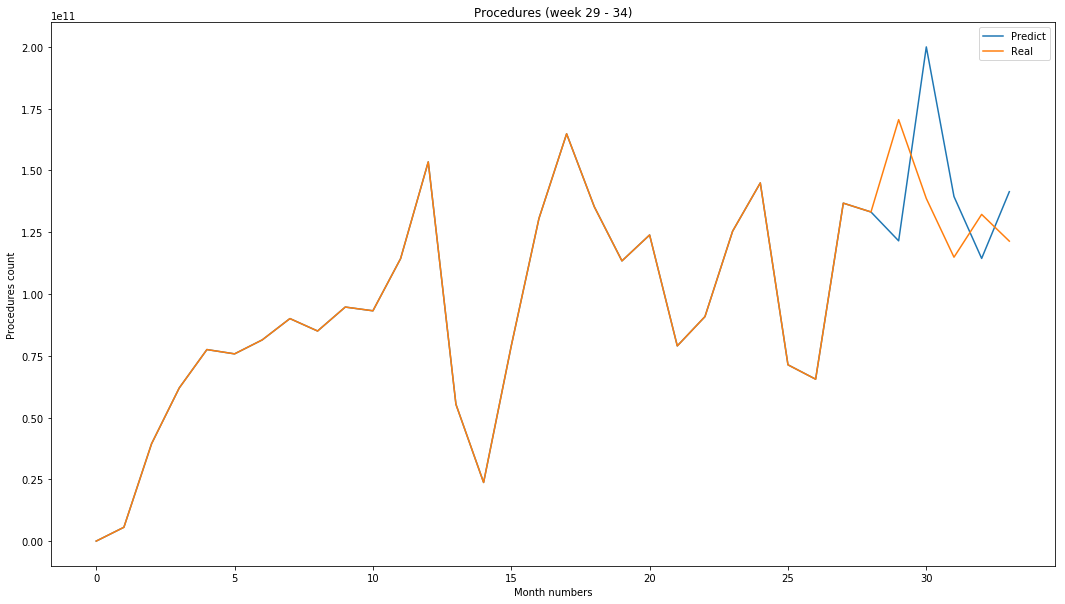

In [26]:

plt.plot(predict_ProcRF4)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [27]:
%%time
mean_errorRF4_n = []
total_errorRF4_n = []
ProcRF4_n = copy.copy(procedures)
predict_ProcRF4_n = copy.copy(procedures)
abs_pr_errorRF4_n = []
for month in range(month_start, month_end):
    train = melt4[melt4['Month'] < month]
    val = melt4[melt4['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF4_n.append(error)
    total_errorRF4_n.append(abs_error)
    ProcRF4_n.append(total_yts)
    predict_ProcRF4_n.append(total_p)
    abs_pr_errorRF4_n.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF4_n))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF4_n))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF4_n))

Month 29 - Error 2.06842, Real Total 170517288029.3 - Predict Total 87115725617.0, Abs Error 83401562412.3, Persent - 48.9
Month 30 - Error 1.59518, Real Total 138610185794.3 - Predict Total 141542537803.9, Abs Error 2932352009.6, Persent - 2.1
Month 31 - Error 1.83406, Real Total 114863526233.8 - Predict Total 113870801445.8, Abs Error 992724788.0, Persent - 0.9
Month 32 - Error 2.16219, Real Total 132186973999.4 - Predict Total 88514495591.1, Abs Error 43672478408.2, Persent - 33.0
Month 33 - Error 2.19761, Real Total 121359958523.1 - Predict Total 121922224572.0, Abs Error 562266048.9, Persent - 0.5
Mean Error = 1.97149
Mean Abs Error = 26312276733.39154
Mean Abs Error persent = 17.07849
Wall time: 33.8 s


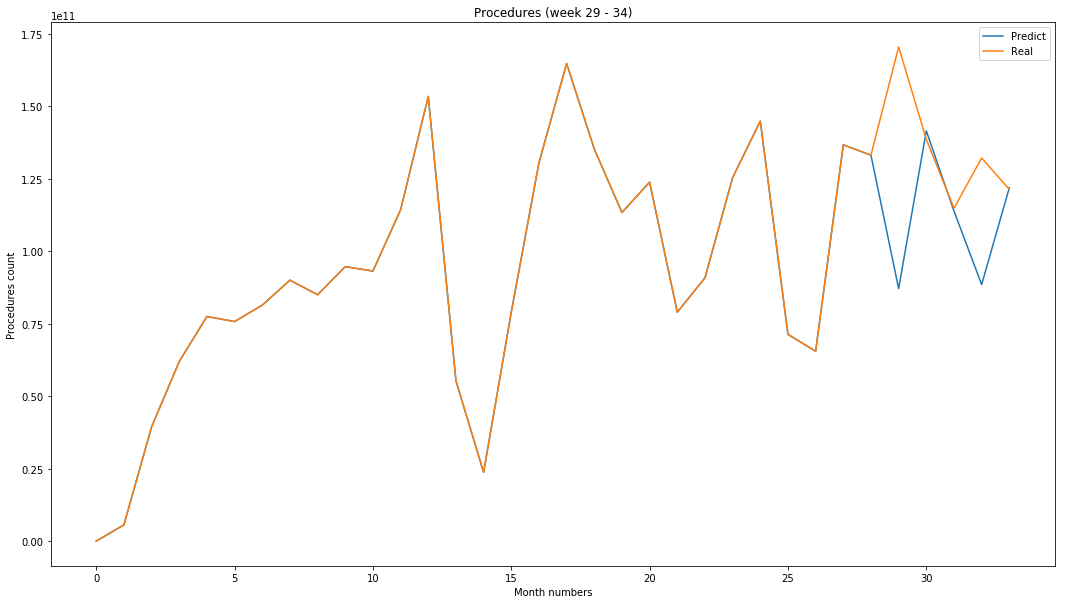

In [28]:

plt.plot(predict_ProcRF4_n)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [29]:
%%time
mean_errorGB4 = []
total_errorGB4 = []
ProcGB4 = copy.copy(procedures)
predict_ProcGB4 = copy.copy(procedures)
abs_pr_errorGB4 = []
for month in range(month_start, month_end):
    train = melt4[melt4['Month'] < month]
    val = melt4[melt4['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorGB4.append(error)
    total_errorGB4.append(abs_error)
    ProcGB4.append(total_yts)
    predict_ProcGB4.append(total_p)
    abs_pr_errorGB4.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorGB4))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB4))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorGB4))

Month 29 - Error 1.86664, Real Total 170517288029.3 - Predict Total 104938965779.8, Abs Error 65578322249.5, Persent - 38.5
Month 30 - Error 1.80605, Real Total 138610185794.3 - Predict Total 127127381655.6, Abs Error 11482804138.7, Persent - 8.3
Month 31 - Error 1.80576, Real Total 114863526233.8 - Predict Total 106484772032.9, Abs Error 8378754200.9, Persent - 7.3
Month 32 - Error 2.14863, Real Total 132186973999.4 - Predict Total 90382021605.9, Abs Error 41804952393.4, Persent - 31.6
Month 33 - Error 2.34183, Real Total 121359958523.1 - Predict Total 118696757495.0, Abs Error 2663201028.1, Persent - 2.2
Mean Error = 1.99378
Mean Abs Error = 25981606802.12725
Mean Abs Error persent = 17.57146
Wall time: 8.15 s


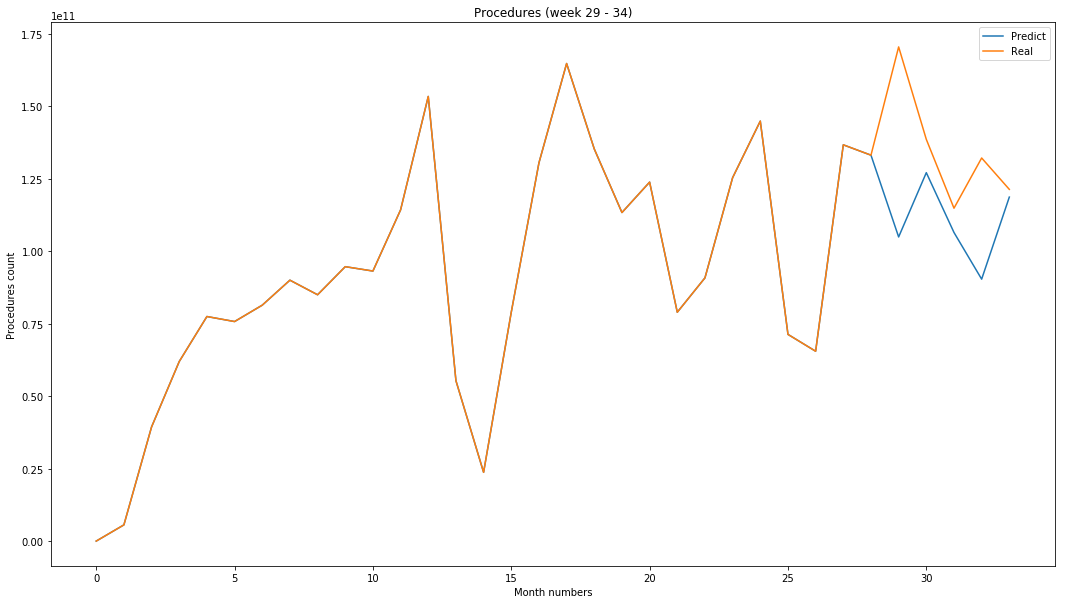

In [30]:

plt.plot(predict_ProcGB4)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [31]:
%%time
melt12 = melt.copy()
melt12['Last_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift()
melt12['Last_Month_Diff'] = melt12.groupby(['RegCode'])['Last_Month_Proc'].diff()
melt12['Last-1_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(2)
melt12['Last-1_Month_Diff'] = melt12.groupby(['RegCode'])['Last-1_Month_Proc'].diff()
melt12['Last-2_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-2_Month_Diff'] = melt12.groupby(['RegCode'])['Last-2_Month_Proc'].diff()
melt12['Last-3_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-3_Month_Diff'] = melt12.groupby(['RegCode'])['Last-3_Month_Proc'].diff()
melt12['Last-4_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-4_Month_Diff'] = melt12.groupby(['RegCode'])['Last-4_Month_Proc'].diff()
melt12['Last-5_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-5_Month_Diff'] = melt12.groupby(['RegCode'])['Last-5_Month_Proc'].diff()
melt12['Last-6_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-6_Month_Diff'] = melt12.groupby(['RegCode'])['Last-6_Month_Proc'].diff()
melt12['Last-7_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-7_Month_Diff'] = melt12.groupby(['RegCode'])['Last-7_Month_Proc'].diff()
melt12['Last-8_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-8_Month_Diff'] = melt12.groupby(['RegCode'])['Last-8_Month_Proc'].diff()
melt12['Last-9_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-9_Month_Diff'] = melt12.groupby(['RegCode'])['Last-9_Month_Proc'].diff()
melt12['Last-10_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-10_Month_Diff'] = melt12.groupby(['RegCode'])['Last-10_Month_Proc'].diff()
melt12['Last-11_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(2)
melt12['Last-11_Month_Diff'] = melt12.groupby(['RegCode'])['Last-11_Month_Proc'].diff()
melt12['Last-12_Month_Proc'] = melt12.groupby(['RegCode'])['Proc'].shift(3)
melt12['Last-12_Month_Diff'] = melt12.groupby(['RegCode'])['Last-12_Month_Proc'].diff()
melt12 = melt12.dropna()
melt12.head()

Wall time: 249 ms


In [32]:
%%time
mean_errorRF12 = []
total_errorRF12 = []
ProcRF12 = copy.copy(procedures)
predict_ProcRF12 = copy.copy(procedures)
abs_pr_errorRF12 = []
for month in range(month_start, month_end):
    train = melt12[melt12['Month'] < month]
    val = melt12[melt12['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF12.append(error)
    total_errorRF12.append(abs_error)
    ProcRF12.append(total_yts)
    predict_ProcRF12.append(total_p)
    abs_pr_errorRF12.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF12))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF12))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF12))

Month 29 - Error 3.25140, Real Total 170517288029.3 - Predict Total 122118112411.4, Abs Error 48399175617.9, Persent - 28.4
Month 30 - Error 3.00808, Real Total 138610185794.3 - Predict Total 201621969909.0, Abs Error 63011784114.7, Persent - 45.5
Month 31 - Error 3.09574, Real Total 114863526233.8 - Predict Total 138803503788.7, Abs Error 23939977554.9, Persent - 20.8
Month 32 - Error 3.30287, Real Total 132186973999.4 - Predict Total 114285710468.4, Abs Error 17901263531.0, Persent - 13.5
Month 33 - Error 3.62855, Real Total 121359958523.1 - Predict Total 139989084541.7, Abs Error 18629126018.6, Persent - 15.4
Mean Error = 3.25733
Mean Abs Error = 34376265367.42309
Mean Abs Error persent = 24.71565
Wall time: 1min 58s


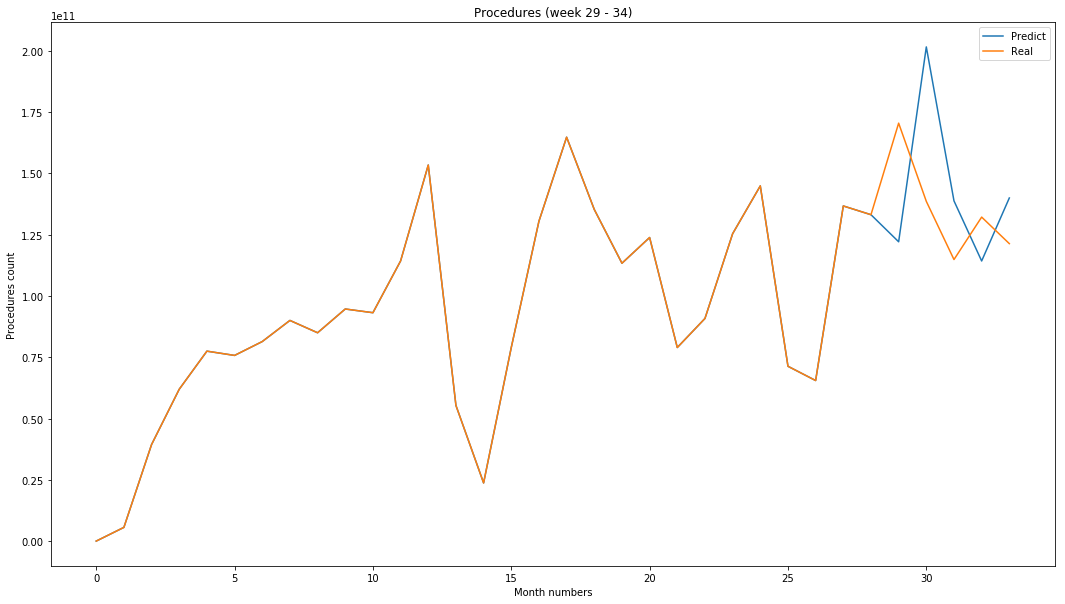

In [33]:

plt.plot(predict_ProcRF12)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [34]:
%%time
mean_errorGB12 = []
total_errorGB12 = []
ProcGB12 = copy.copy(procedures)
predict_ProcGB12 = copy.copy(procedures)
abs_pr_errorGB12 = []
for month in range(month_start, month_end):
    train = melt12[melt12['Month'] < month]
    val = melt12[melt12['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorGB12.append(error)
    total_errorGB12.append(abs_error)
    ProcGB12.append(total_yts)
    predict_ProcGB12.append(total_p)
    abs_pr_errorGB12.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorGB12))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB12))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorGB12))

Month 29 - Error 1.86664, Real Total 170517288029.3 - Predict Total 104938965779.8, Abs Error 65578322249.5, Persent - 38.5
Month 30 - Error 1.80605, Real Total 138610185794.3 - Predict Total 127127381655.6, Abs Error 11482804138.7, Persent - 8.3
Month 31 - Error 1.80576, Real Total 114863526233.8 - Predict Total 106484772032.9, Abs Error 8378754200.9, Persent - 7.3
Month 32 - Error 2.14863, Real Total 132186973999.4 - Predict Total 90382021605.9, Abs Error 41804952393.4, Persent - 31.6
Month 33 - Error 2.34183, Real Total 121359958523.1 - Predict Total 118696757495.0, Abs Error 2663201028.1, Persent - 2.2
Mean Error = 1.99378
Mean Abs Error = 25981606802.12725
Mean Abs Error persent = 17.57146
Wall time: 26.7 s


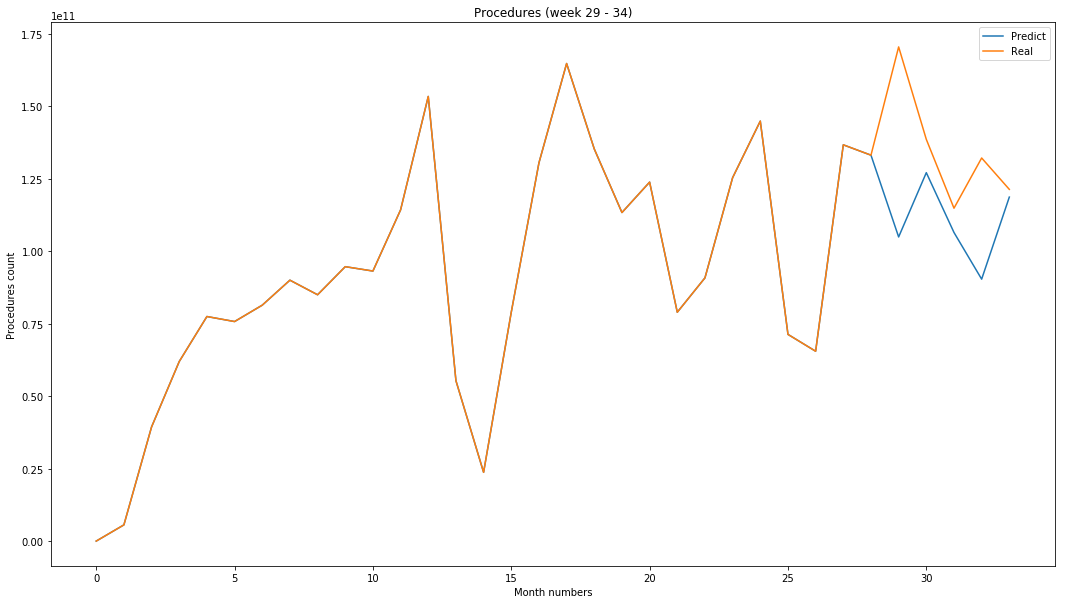

In [35]:

plt.plot(predict_ProcGB12)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [36]:
%%time
mean_errorLR12 = []
total_errorLR12 = []
ProcLR12 = copy.copy(procedures)
predict_ProcLR12 = copy.copy(procedures)
abs_pr_errorLR12 = []
for Month in range(month_start, month_end):
    train = melt12[melt12['Month'] < Month]
    val = melt12[melt12['Month'] == Month]

    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    p=abs(p)
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (Month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorLR12.append(error)
    total_errorLR12.append(abs_error)
    ProcLR12.append(total_yts)
    predict_ProcLR12.append(total_p)
    abs_pr_errorLR12.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorLR12))
print('Mean Abs Error = %.5f' % np.mean(total_errorLR12))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorLR12))

Month 29 - Error 4.19374, Real Total 170517288029.3 - Predict Total 109788071199.9, Abs Error 60729216829.4, Persent - 35.6
Month 30 - Error 4.36814, Real Total 138610185794.3 - Predict Total 167255523008.5, Abs Error 28645337214.2, Persent - 20.7
Month 31 - Error 4.22890, Real Total 114863526233.8 - Predict Total 134885266021.0, Abs Error 20021739787.2, Persent - 17.4
Month 32 - Error 4.63562, Real Total 132186973999.4 - Predict Total 125135949899.6, Abs Error 7051024099.8, Persent - 5.3
Month 33 - Error 5.22185, Real Total 121359958523.1 - Predict Total 141692908776.5, Abs Error 20332950253.4, Persent - 16.8
Mean Error = 4.52965
Mean Abs Error = 27356053636.79859
Mean Abs Error persent = 19.16002
Wall time: 55 ms


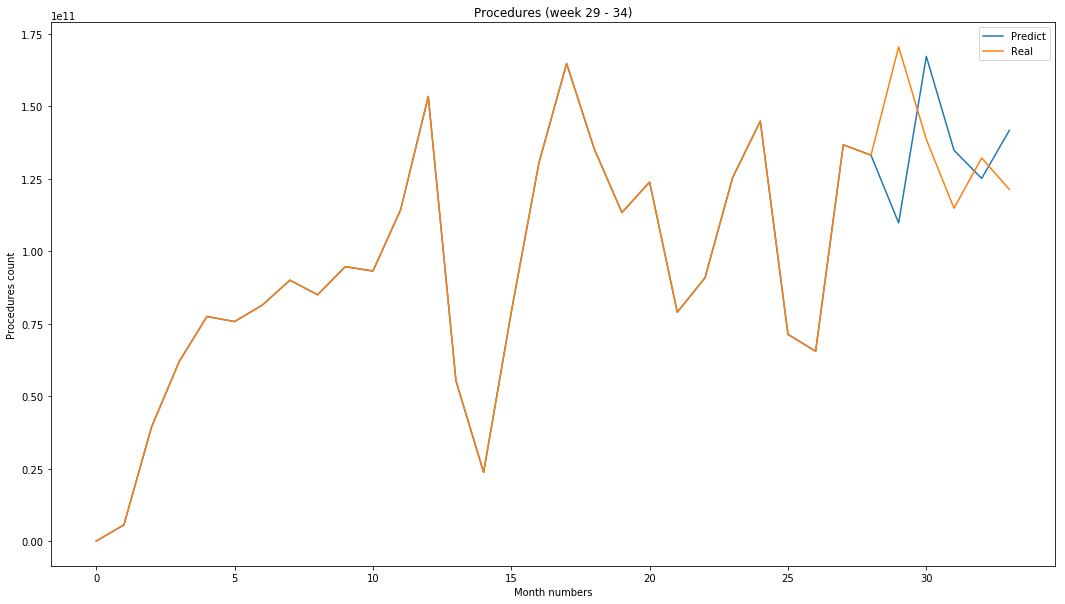

In [37]:

plt.plot(predict_ProcLR12)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

C:\Users\a.solodov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\a.solodov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


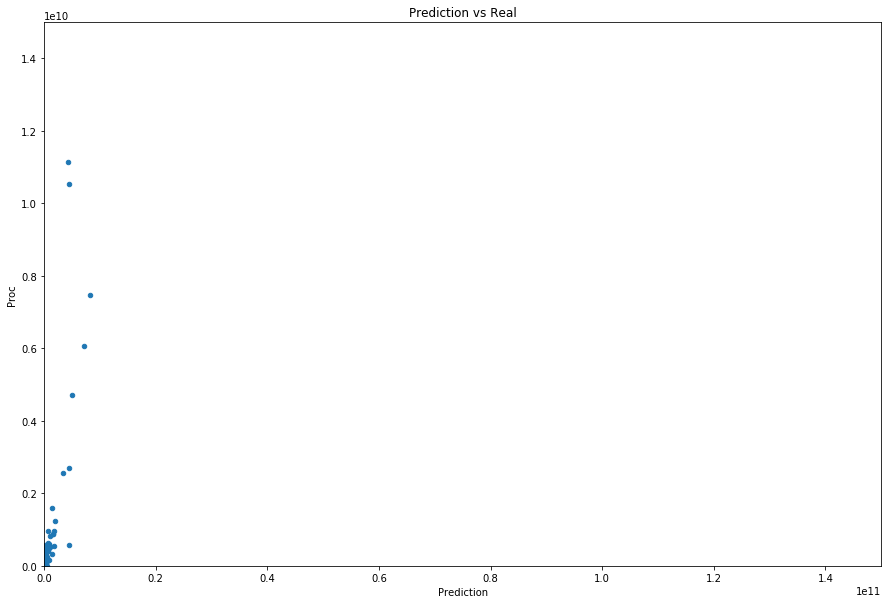

In [38]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='Proc', figsize=(15,10), title='Prediction vs Real', 
                 ylim=(0,15000000000), xlim=(0,150000000000))

In [39]:
%%time
melt24 = melt.copy()
melt24['Last_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift()
melt24['Last_Month_Diff'] = melt24.groupby(['RegCode'])['Last_Month_Proc'].diff()
melt24['Last-1_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(2)
melt24['Last-1_Month_Diff'] = melt24.groupby(['RegCode'])['Last-1_Month_Proc'].diff()
melt24['Last-2_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-2_Month_Diff'] = melt24.groupby(['RegCode'])['Last-2_Month_Proc'].diff()
melt24['Last-3_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-3_Month_Diff'] = melt24.groupby(['RegCode'])['Last-3_Month_Proc'].diff()
melt24['Last-4_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-4_Month_Diff'] = melt24.groupby(['RegCode'])['Last-4_Month_Proc'].diff()
melt24['Last-5_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-5_Month_Diff'] = melt24.groupby(['RegCode'])['Last-5_Month_Proc'].diff()
melt24['Last-6_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-6_Month_Diff'] = melt24.groupby(['RegCode'])['Last-6_Month_Proc'].diff()
melt24['Last-7_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-7_Month_Diff'] = melt24.groupby(['RegCode'])['Last-7_Month_Proc'].diff()
melt24['Last-8_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-8_Month_Diff'] = melt24.groupby(['RegCode'])['Last-8_Month_Proc'].diff()
melt24['Last-9_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-9_Month_Diff'] = melt24.groupby(['RegCode'])['Last-9_Month_Proc'].diff()
melt24['Last-10_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-10_Month_Diff'] = melt24.groupby(['RegCode'])['Last-10_Month_Proc'].diff()
melt24['Last-11_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(2)
melt24['Last-11_Month_Diff'] = melt24.groupby(['RegCode'])['Last-11_Month_Proc'].diff()
melt24['Last-12_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-12_Month_Diff'] = melt24.groupby(['RegCode'])['Last-12_Month_Proc'].diff()
melt24['Last-13_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-13_Month_Diff'] = melt24.groupby(['RegCode'])['Last-13_Month_Proc'].diff()
melt24['Last-14_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-14_Month_Diff'] = melt24.groupby(['RegCode'])['Last-14_Month_Proc'].diff()
melt24['Last-15_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-15_Month_Diff'] = melt24.groupby(['RegCode'])['Last-15_Month_Proc'].diff()
melt24['Last-16_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-16_Month_Diff'] = melt24.groupby(['RegCode'])['Last-16_Month_Proc'].diff()
melt24['Last-17_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-17_Month_Diff'] = melt24.groupby(['RegCode'])['Last-17_Month_Proc'].diff()
melt24['Last-18_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-18_Month_Diff'] = melt24.groupby(['RegCode'])['Last-18_Month_Proc'].diff()
melt24['Last-19_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-19_Month_Diff'] = melt24.groupby(['RegCode'])['Last-19_Month_Proc'].diff()
melt24['Last-20_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-20_Month_Diff'] = melt24.groupby(['RegCode'])['Last-20_Month_Proc'].diff()
melt24['Last-21_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(2)
melt24['Last-21_Month_Diff'] = melt24.groupby(['RegCode'])['Last-21_Month_Proc'].diff()
melt24['Last-22_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-22_Month_Diff'] = melt24.groupby(['RegCode'])['Last-22_Month_Proc'].diff()
melt24['Last-23_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-23_Month_Diff'] = melt24.groupby(['RegCode'])['Last-23_Month_Proc'].diff()
melt24['Last-24_Month_Proc'] = melt24.groupby(['RegCode'])['Proc'].shift(3)
melt24['Last-24_Month_Diff'] = melt24.groupby(['RegCode'])['Last-24_Month_Proc'].diff()
melt24 = melt24.dropna()
melt24.head()

Wall time: 505 ms


In [40]:
%%time
mean_errorRF24 = []
total_errorRF24 = []
ProcRF24 = copy.copy(procedures)
predict_ProcRF24 = copy.copy(procedures)
abs_pr_errorRF24 = []
for month in range(month_start, month_end):
    train = melt24[melt24['Month'] < month]
    val = melt24[melt24['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorRF24.append(error)
    total_errorRF24.append(abs_error)
    ProcRF24.append(total_yts)
    predict_ProcRF24.append(total_p)
    abs_pr_errorRF24.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorRF24))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF24))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF24))

Month 29 - Error 3.26859, Real Total 170517288029.3 - Predict Total 122410577404.4, Abs Error 48106710624.9, Persent - 28.2
Month 30 - Error 3.04773, Real Total 138610185794.3 - Predict Total 201682438080.3, Abs Error 63072252286.0, Persent - 45.5
Month 31 - Error 3.07521, Real Total 114863526233.8 - Predict Total 138773783444.1, Abs Error 23910257210.4, Persent - 20.8
Month 32 - Error 3.30230, Real Total 132186973999.4 - Predict Total 114137524955.8, Abs Error 18049449043.6, Persent - 13.7
Month 33 - Error 3.70111, Real Total 121359958523.1 - Predict Total 140066348699.4, Abs Error 18706390176.3, Persent - 15.4
Mean Error = 3.27899
Mean Abs Error = 34369011868.23219
Mean Abs Error persent = 24.72005
Wall time: 3min 23s


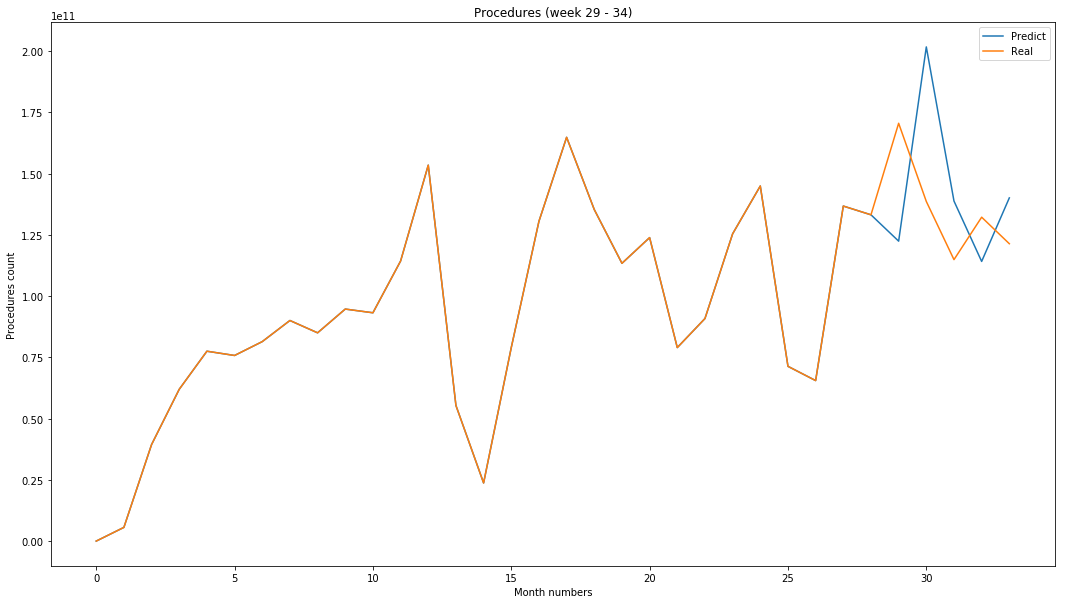

In [41]:

plt.plot(predict_ProcRF24)
plt.plot(proceduresAll)
plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [42]:
%%time
mean_errorGB24 = []
total_errorGB24 = []
ProcGB24 = copy.copy(procedures)
predict_ProcGB24 = copy.copy(procedures)
abs_pr_errorGB24 = []
for month in range(month_start, month_end):
    train = melt24[melt24['Month'] < month]
    val = melt24[melt24['Month'] == month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorGB24.append(error)
    total_errorGB24.append(abs_error)
    ProcGB24.append(total_yts)
    predict_ProcGB24.append(total_p)
    abs_pr_errorGB24.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorGB24))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB24))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorGB24))

Month 29 - Error 1.86664, Real Total 170517288029.3 - Predict Total 104938965779.8, Abs Error 65578322249.5, Persent - 38.5
Month 30 - Error 1.80605, Real Total 138610185794.3 - Predict Total 127127381655.6, Abs Error 11482804138.7, Persent - 8.3
Month 31 - Error 1.80576, Real Total 114863526233.8 - Predict Total 106484772032.9, Abs Error 8378754200.9, Persent - 7.3
Month 32 - Error 2.14863, Real Total 132186973999.4 - Predict Total 90382021605.9, Abs Error 41804952393.4, Persent - 31.6
Month 33 - Error 2.34183, Real Total 121359958523.1 - Predict Total 118696757495.0, Abs Error 2663201028.1, Persent - 2.2
Mean Error = 1.99378
Mean Abs Error = 25981606802.12725
Mean Abs Error persent = 17.57146
Wall time: 39.4 s


In [43]:
%%time
mean_errorLR24 = []
total_errorLR24 = []
ProcLR24 = copy.copy(procedures)
predict_ProcLR24 = copy.copy(procedures)
abs_pr_errorLR24 = []
for Month in range(month_start, month_end):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]

    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    p=abs(p)
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (Month, error, total_yts, total_p, abs_error, abs_pr))
    mean_errorLR24.append(error)
    total_errorLR24.append(abs_error)
    ProcLR24.append(total_yts)
    predict_ProcLR24.append(total_p)
    abs_pr_errorLR24.append(abs_pr)
print('Mean Error = %.5f' % np.mean(mean_errorLR24))
print('Mean Abs Error = %.5f' % np.mean(total_errorLR24))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorLR24))

Month 29 - Error 4.14279, Real Total 170517288029.3 - Predict Total 109024687538.6, Abs Error 61492600490.7, Persent - 36.1
Month 30 - Error 4.10118, Real Total 138610185794.3 - Predict Total 161081955262.5, Abs Error 22471769468.2, Persent - 16.2
Month 31 - Error 4.42130, Real Total 114863526233.8 - Predict Total 134356462747.0, Abs Error 19492936513.2, Persent - 17.0
Month 32 - Error 4.74733, Real Total 132186973999.4 - Predict Total 127692637885.9, Abs Error 4494336113.4, Persent - 3.4
Month 33 - Error 5.07398, Real Total 121359958523.1 - Predict Total 139559253235.7, Abs Error 18199294712.6, Persent - 15.0
Mean Error = 4.49731
Mean Abs Error = 25230187459.63015
Mean Abs Error persent = 17.52824
Wall time: 54 ms


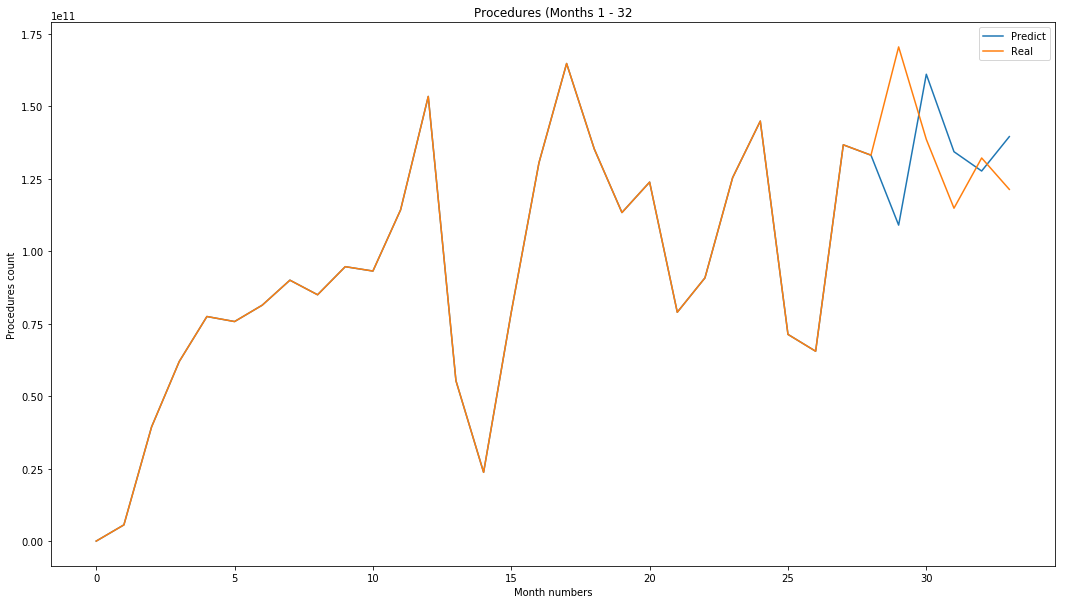

In [44]:

plt.plot(predict_ProcLR24)
plt.plot(proceduresAll)
plt.title('Procedures (Months 1 - 32')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

(600000000, 220000000000)

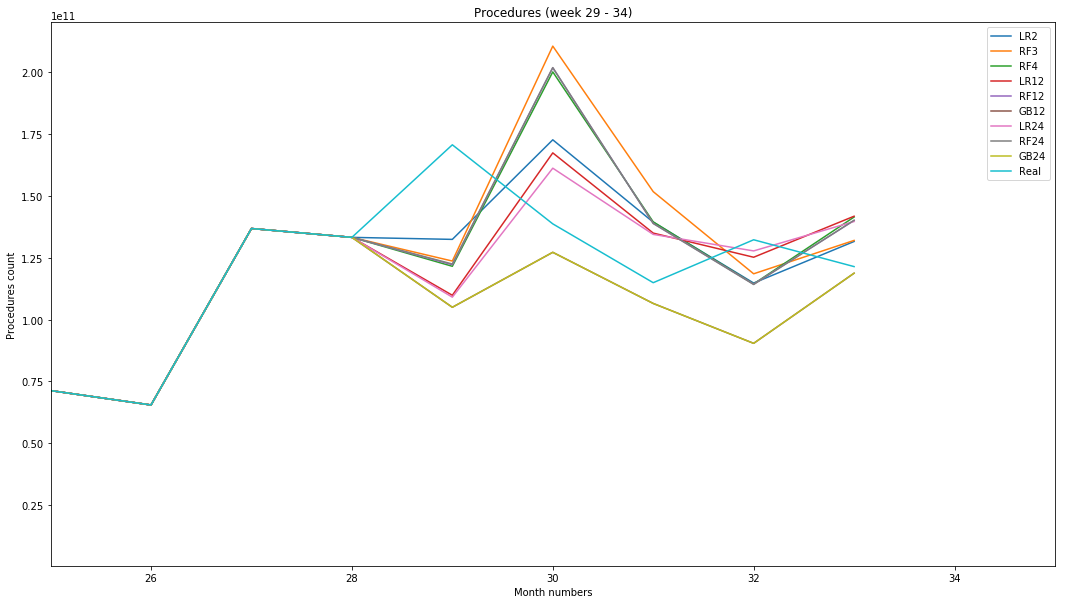

In [45]:
plt.plot(predict_Proc2)
plt.plot(predict_ProcRF3)
plt.plot(predict_ProcRF4)
plt.plot(predict_ProcLR12)
plt.plot(predict_ProcRF12)
plt.plot(predict_ProcGB12)
plt.plot(predict_ProcLR24)
plt.plot(predict_ProcRF24)
plt.plot(predict_ProcGB24)
plt.plot(proceduresAll)

plt.title(s)
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('LR2', 'RF3', 'RF4', 'LR12', 'RF12', 'GB12', 'LR24', 'RF24', 'GB24', 'Real'))
plt.xlim(25, 35)
plt.ylim(600000000, 220000000000)

In [46]:
print('Mean Error baseline = %.5f' % np.mean(mean_errorB))
print('Mean Abs Error baseline = %.5f' % np.mean(total_errorB))
print('Mean Abs Error baseline persent = %.5f' % np.mean(abs_pr_errorB))
print('Mean Error LR2 = %.5f' % np.mean(mean_error2))
print('Mean Abs Error LR2 = %.5f' % np.mean(total_error2))
print('Mean Abs Error LR2 persent = %.5f' % np.mean(abs_pr_error2))
print('Mean Error RF2 = %.5f' % np.mean(mean_errorRF2))
print('Mean Abs Error RF2 = %.5f' % np.mean(total_errorRF2))
print('Mean Abs Error RF2 persent = %.5f' % np.mean(abs_pr_errorRF2))
print('Mean Error RF3 = %.5f' % np.mean(mean_errorRF3))
print('Mean Abs Error RF3 = %.5f' % np.mean(total_errorRF3))
print('Mean Abs Error RF3 persent = %.5f' % np.mean(abs_pr_errorRF3))
print('Mean Error RF4 = %.5f' % np.mean(mean_errorRF4))
print('Mean Abs Error RF4 = %.5f' % np.mean(total_errorRF4))
print('Mean Abs Error RF4 persent = %.5f' % np.mean(abs_pr_errorRF4))
print('Mean Error RF4_n = %.5f' % np.mean(mean_errorRF4_n))
print('Mean Abs Error RF4_n = %.5f' % np.mean(total_errorRF4_n))
print('Mean Abs Error RF4_n persent = %.5f' % np.mean(abs_pr_errorRF4_n))
print('Mean Error GB4 = %.5f' % np.mean(mean_errorGB4))
print('Mean Abs Error GB4 = %.5f' % np.mean(total_errorGB4))
print('Mean Abs Error GB4 persent = %.5f' % np.mean(abs_pr_errorGB4))
print('Mean Error LR12 = %.5f' % np.mean(mean_errorLR12))
print('Mean Abs Error LR12 = %.5f' % np.mean(total_errorLR12))
print('Mean Abs Error LR12 persent = %.5f' % np.mean(abs_pr_errorLR12))
print('Mean Error = %.5f' % np.mean(mean_errorRF12))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF12))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF12))
print('Mean Error GB12 = %.5f' % np.mean(mean_errorGB12))
print('Mean Abs Error GB12 = %.5f' % np.mean(total_errorGB12))
print('Mean Abs Error GB12 persent = %.5f' % np.mean(abs_pr_errorGB12))
print('Mean Error LR24 = %.5f' % np.mean(mean_errorLR24))
print('Mean Abs Error LR24 = %.5f' % np.mean(total_errorLR24))
print('Mean Abs Error LR24 persent = %.5f' % np.mean(abs_pr_errorLR24))
print('Mean Error = %.5f' % np.mean(mean_errorRF24))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF24))
print('Mean Abs Error persent = %.5f' % np.mean(abs_pr_errorRF24))
print('Mean Error GB24 = %.5f' % np.mean(mean_errorGB24))
print('Mean Abs Error GB24 = %.5f' % np.mean(total_errorGB24))
print('Mean Abs Error GB24 persent = %.5f' % np.mean(abs_pr_errorGB24))

Mean Error baseline = 2.24694
Mean Abs Error baseline = 24232314476.90402
Mean Abs Error baseline persent = 17.52560
Mean Error LR2 = 4.73806
Mean Abs Error LR2 = 24828749406.01461
Mean Abs Error LR2 persent = 17.94142
Mean Error RF2 = 3.28472
Mean Abs Error RF2 = 37818409026.65644
Mean Abs Error RF2 persent = 28.05493
Mean Error RF3 = 3.31971
Mean Abs Error RF3 = 35940852159.53589
Mean Abs Error RF3 persent = 26.07194
Mean Error RF4 = 3.24652
Mean Abs Error RF4 = 34549819079.95946
Mean Abs Error RF4 persent = 24.86966
Mean Error RF4_n = 1.97149
Mean Abs Error RF4_n = 26312276733.39153
Mean Abs Error RF4_n persent = 17.07849
Mean Error GB4 = 1.99378
Mean Abs Error GB4 = 25981606802.12725
Mean Abs Error GB4 persent = 17.57146
Mean Error LR12 = nan
Mean Abs Error LR12 = nan
Mean Abs Error LR12 persent = nan
Mean Error = 3.25733
Mean Abs Error = 34376265367.42309
Mean Abs Error persent = 24.71565
Mean Error GB12 = 1.99378
Mean Abs Error GB12 = 25981606802.12725
Mean Abs Error GB12 persent

C:\Users\a.solodov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\a.solodov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [51]:
cols = ['RegCode', 'Month', 'Last_Month_Proc', 'Last_Month_Diff',
       'Last-1_Month_Proc', 'Last-1_Month_Diff', 'Last-2_Month_Proc',
       'Last-2_Month_Diff', 'Last-3_Month_Proc', 'Last-3_Month_Diff',
       'Last-4_Month_Proc', 'Last-4_Month_Diff', 'Last-5_Month_Proc',
       'Last-5_Month_Diff', 'Last-6_Month_Proc', 'Last-6_Month_Diff',
       'Last-7_Month_Proc', 'Last-7_Month_Diff', 'Last-8_Month_Proc',
       'Last-8_Month_Diff', 'Last-9_Month_Proc', 'Last-9_Month_Diff',
       'Last-10_Month_Proc', 'Last-10_Month_Diff', 'Last-11_Month_Proc',
       'Last-11_Month_Diff', 'Last-12_Month_Proc', 'Last-12_Month_Diff',
       'Last-13_Month_Proc', 'Last-13_Month_Diff', 'Last-14_Month_Proc',
       'Last-14_Month_Diff', 'Last-15_Month_Proc', 'Last-15_Month_Diff',
       'Last-16_Month_Proc', 'Last-16_Month_Diff', 'Last-17_Month_Proc',
       'Last-17_Month_Diff', 'Last-18_Month_Proc', 'Last-18_Month_Diff',
       'Last-19_Month_Proc', 'Last-19_Month_Diff', 'Last-20_Month_Proc',
       'Last-20_Month_Diff', 'Last-21_Month_Proc', 'Last-21_Month_Diff',
       'Last-22_Month_Proc', 'Last-22_Month_Diff', 'Last-23_Month_Proc',
       'Last-23_Month_Diff', 'Last-24_Month_Proc', 'Last-24_Month_Diff']

In [52]:
%%time
#Заготовка под массив столбцов
c = []
colMeanError =[]
#Переменная под максимальное значение score
minErrorValue=100
colMeanAbsError =[]
minAbsErrorValue=100
minAbsError=250000000000
  
#Запоминаем длинну выборки столбцов - 1 (последний столбец - целевая переменная)
l=len(cols) - 1
#В трех циклах последовательно проходим по столбцам и формируем тройки, для каждой трокий делаем get_dummies для 
#перечислимых переменных, строим модель и вычисляем score.
#В переменных maxValue и bestParams сохраняем значения лучщего score и набор параметров, для которого он получился
bestCols = []
for i in range(0, l, 1):
    for j in range(i+1, l, 1):
        #Проверяем, что у нас нет одинаковых столбцов в выборке
        if cols[i]==cols[j]:
            continue
        c = []
        #Добавляем названия столбцов в выборку    
        c.append(cols[i])
        c.append(cols[j])
        mean_error = []
        total_error = []
        Proc = copy.copy(procedures)
        predict_Proc = copy.copy(procedures)
        abs_pr_error = []
        for Month in range(month_start, month_end):
            train = melt24[melt24['Month'] < Month]
            val = melt24[melt24['Month'] == Month]
            
            #Выделяем столбцы для эксперимента
            xtr, xts = train[c].values, val[c].values
            ytr, yts = train['Proc'].values, val['Proc'].values
                
            mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
            mdl.fit(xtr, ytr)
    
            p = mdl.predict(xts)
    
            total_yts=sum(yts)
            total_p=sum(p)
                
            error = rmsle(yts, p)
            abs_error = abs(total_yts-total_p)
            abs_pr = abs_error/total_yts*100

            #print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
            mean_error.append(error)
            total_error.append(abs_error)
            Proc.append(total_yts)
            predict_Proc.append(total_p)
            abs_pr_error.append(abs_pr)
        MR = np.mean(mean_error)
        TR = np.mean(total_error)
        TRP = np.mean(abs_pr_error)
        print(c)
        print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))
        if MR<minErrorValue:
            minErrorValue=MR
            colMeanAbsError=c
        if TRP<minAbsErrorValue:
            minAbsErrorValue=TRP
            colMeanAbsError=c
        if TR<minAbsError:
            minAbsError=TR
            bestCols=c
                

['RegCode', 'Month']
Mean Error 3.05829, Abs Error 22522666180.4, Abs Error Persent - 16.3
['RegCode', 'Last_Month_Proc']
Mean Error 3.03124, Abs Error 25442241321.7, Abs Error Persent - 18.6
['RegCode', 'Last_Month_Diff']
Mean Error 3.22159, Abs Error 35974129996.4, Abs Error Persent - 25.8
['RegCode', 'Last-1_Month_Proc']
Mean Error 3.01915, Abs Error 26874041022.8, Abs Error Persent - 20.6
['RegCode', 'Last-1_Month_Diff']
Mean Error 3.12398, Abs Error 24908254582.1, Abs Error Persent - 19.3
['RegCode', 'Last-2_Month_Proc']
Mean Error 2.90390, Abs Error 37704456109.0, Abs Error Persent - 25.6
['RegCode', 'Last-2_Month_Diff']
Mean Error 3.11838, Abs Error 29711320155.7, Abs Error Persent - 20.3
['RegCode', 'Last-3_Month_Proc']
Mean Error 2.90390, Abs Error 37704456109.0, Abs Error Persent - 25.6
['RegCode', 'Last-3_Month_Diff']
Mean Error 3.11838, Abs Error 29711320155.7, Abs Error Persent - 20.3
['RegCode', 'Last-4_Month_Proc']
Mean Error 2.90390, Abs Error 37704456109.0, Abs Error P

['Month', 'Last-15_Month_Proc']
Mean Error 3.43672, Abs Error 55727983236.9, Abs Error Persent - 40.2
['Month', 'Last-15_Month_Diff']
Mean Error 4.01895, Abs Error 46884076996.6, Abs Error Persent - 32.7
['Month', 'Last-16_Month_Proc']
Mean Error 3.43672, Abs Error 55727983236.9, Abs Error Persent - 40.2
['Month', 'Last-16_Month_Diff']
Mean Error 4.01895, Abs Error 46884076996.6, Abs Error Persent - 32.7
['Month', 'Last-17_Month_Proc']
Mean Error 3.43672, Abs Error 55727983236.9, Abs Error Persent - 40.2
['Month', 'Last-17_Month_Diff']
Mean Error 4.01895, Abs Error 46884076996.6, Abs Error Persent - 32.7
['Month', 'Last-18_Month_Proc']
Mean Error 3.43672, Abs Error 55727983236.9, Abs Error Persent - 40.2
['Month', 'Last-18_Month_Diff']
Mean Error 4.01895, Abs Error 46884076996.6, Abs Error Persent - 32.7
['Month', 'Last-19_Month_Proc']
Mean Error 3.43672, Abs Error 55727983236.9, Abs Error Persent - 40.2
['Month', 'Last-19_Month_Diff']
Mean Error 4.01895, Abs Error 46884076996.6, Abs E

['Last_Month_Diff', 'Last-5_Month_Diff']
Mean Error 3.39628, Abs Error 33034700398.1, Abs Error Persent - 22.8
['Last_Month_Diff', 'Last-6_Month_Proc']
Mean Error 3.33649, Abs Error 30990815370.5, Abs Error Persent - 20.2
['Last_Month_Diff', 'Last-6_Month_Diff']
Mean Error 3.39628, Abs Error 33034700398.1, Abs Error Persent - 22.8
['Last_Month_Diff', 'Last-7_Month_Proc']
Mean Error 3.33649, Abs Error 30990815370.5, Abs Error Persent - 20.2
['Last_Month_Diff', 'Last-7_Month_Diff']
Mean Error 3.39628, Abs Error 33034700398.1, Abs Error Persent - 22.8
['Last_Month_Diff', 'Last-8_Month_Proc']
Mean Error 3.33649, Abs Error 30990815370.5, Abs Error Persent - 20.2
['Last_Month_Diff', 'Last-8_Month_Diff']
Mean Error 3.39628, Abs Error 33034700398.1, Abs Error Persent - 22.8
['Last_Month_Diff', 'Last-9_Month_Proc']
Mean Error 3.33649, Abs Error 30990815370.5, Abs Error Persent - 20.2
['Last_Month_Diff', 'Last-9_Month_Diff']
Mean Error 3.39628, Abs Error 33034700398.1, Abs Error Persent - 22.8
[

['Last-1_Month_Proc', 'Last-19_Month_Proc']
Mean Error 3.76547, Abs Error 28109603871.4, Abs Error Persent - 21.4
['Last-1_Month_Proc', 'Last-19_Month_Diff']
Mean Error 3.18783, Abs Error 24361533474.7, Abs Error Persent - 17.9
['Last-1_Month_Proc', 'Last-20_Month_Proc']
Mean Error 3.76547, Abs Error 28109603871.4, Abs Error Persent - 21.4
['Last-1_Month_Proc', 'Last-20_Month_Diff']
Mean Error 3.18783, Abs Error 24361533474.7, Abs Error Persent - 17.9
['Last-1_Month_Proc', 'Last-21_Month_Proc']
Mean Error 3.86672, Abs Error 32263833961.4, Abs Error Persent - 25.1
['Last-1_Month_Proc', 'Last-21_Month_Diff']
Mean Error 3.73934, Abs Error 24535104406.1, Abs Error Persent - 19.6
['Last-1_Month_Proc', 'Last-22_Month_Proc']
Mean Error 3.76547, Abs Error 28109603871.4, Abs Error Persent - 21.4
['Last-1_Month_Proc', 'Last-22_Month_Diff']
Mean Error 3.18783, Abs Error 24361533474.7, Abs Error Persent - 17.9
['Last-1_Month_Proc', 'Last-23_Month_Proc']
Mean Error 3.76547, Abs Error 28109603871.4,

['Last-2_Month_Proc', 'Last-11_Month_Proc']
Mean Error 3.76545, Abs Error 28136724612.9, Abs Error Persent - 21.4
['Last-2_Month_Proc', 'Last-11_Month_Diff']
Mean Error 3.76918, Abs Error 36436339413.6, Abs Error Persent - 27.8
['Last-2_Month_Proc', 'Last-12_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-2_Month_Proc', 'Last-12_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-2_Month_Proc', 'Last-13_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-2_Month_Proc', 'Last-13_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-2_Month_Proc', 'Last-14_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-2_Month_Proc', 'Last-14_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-2_Month_Proc', 'Last-15_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8,

['Last-3_Month_Proc', 'Last-5_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-3_Month_Proc', 'Last-5_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-3_Month_Proc', 'Last-6_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-3_Month_Proc', 'Last-6_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-3_Month_Proc', 'Last-7_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-3_Month_Proc', 'Last-7_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-3_Month_Proc', 'Last-8_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-3_Month_Proc', 'Last-8_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-3_Month_Proc', 'Last-9_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Erro

['Last-3_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2, Abs Error Persent - 17.8
['Last-3_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2, Abs Error Persent - 16.8
['Last-3_Month_Diff', 'Last-22_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-3_Month_Diff', 'Last-22_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-3_Month_Diff', 'Last-23_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-3_Month_Diff', 'Last-23_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-3_Month_Diff', 'Last-24_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-4_Month_Proc', 'Last-4_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-4_Month_Proc', 'Last-5_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, A

['Last-4_Month_Diff', 'Last-18_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-4_Month_Diff', 'Last-18_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-4_Month_Diff', 'Last-19_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-4_Month_Diff', 'Last-19_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-4_Month_Diff', 'Last-20_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-4_Month_Diff', 'Last-20_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-4_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2, Abs Error Persent - 17.8
['Last-4_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2, Abs Error Persent - 16.8
['Last-4_Month_Diff', 'Last-22_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1,

['Last-5_Month_Diff', 'Last-17_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-5_Month_Diff', 'Last-17_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-5_Month_Diff', 'Last-18_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-5_Month_Diff', 'Last-18_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-5_Month_Diff', 'Last-19_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-5_Month_Diff', 'Last-19_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-5_Month_Diff', 'Last-20_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-5_Month_Diff', 'Last-20_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-5_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2,

['Last-6_Month_Diff', 'Last-17_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-6_Month_Diff', 'Last-18_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-6_Month_Diff', 'Last-18_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-6_Month_Diff', 'Last-19_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-6_Month_Diff', 'Last-19_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-6_Month_Diff', 'Last-20_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-6_Month_Diff', 'Last-20_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-6_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2, Abs Error Persent - 17.8
['Last-6_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2,

['Last-7_Month_Diff', 'Last-20_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-7_Month_Diff', 'Last-20_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-7_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2, Abs Error Persent - 17.8
['Last-7_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2, Abs Error Persent - 16.8
['Last-7_Month_Diff', 'Last-22_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-7_Month_Diff', 'Last-22_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-7_Month_Diff', 'Last-23_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-7_Month_Diff', 'Last-23_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-7_Month_Diff', 'Last-24_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1,

['Last-9_Month_Proc', 'Last-9_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-9_Month_Proc', 'Last-10_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-9_Month_Proc', 'Last-10_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-9_Month_Proc', 'Last-11_Month_Proc']
Mean Error 3.76545, Abs Error 28136724612.9, Abs Error Persent - 21.4
['Last-9_Month_Proc', 'Last-11_Month_Diff']
Mean Error 3.76918, Abs Error 36436339413.6, Abs Error Persent - 27.8
['Last-9_Month_Proc', 'Last-12_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-9_Month_Proc', 'Last-12_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-9_Month_Proc', 'Last-13_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-9_Month_Proc', 'Last-13_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, 

['Last-10_Month_Proc', 'Last-17_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-10_Month_Proc', 'Last-17_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-10_Month_Proc', 'Last-18_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-10_Month_Proc', 'Last-18_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-10_Month_Proc', 'Last-19_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-10_Month_Proc', 'Last-19_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-10_Month_Proc', 'Last-20_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-10_Month_Proc', 'Last-20_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-10_Month_Proc', 'Last-21_Month_Proc']
Mean Error 3.76545, Abs Error 28136

['Last-11_Month_Diff', 'Last-14_Month_Proc']
Mean Error 3.76784, Abs Error 36575739335.9, Abs Error Persent - 27.9
['Last-11_Month_Diff', 'Last-14_Month_Diff']
Mean Error 3.50275, Abs Error 22514417227.3, Abs Error Persent - 16.1
['Last-11_Month_Diff', 'Last-15_Month_Proc']
Mean Error 3.76784, Abs Error 36575739335.9, Abs Error Persent - 27.9
['Last-11_Month_Diff', 'Last-15_Month_Diff']
Mean Error 3.50275, Abs Error 22514417227.3, Abs Error Persent - 16.1
['Last-11_Month_Diff', 'Last-16_Month_Proc']
Mean Error 3.76784, Abs Error 36575739335.9, Abs Error Persent - 27.9
['Last-11_Month_Diff', 'Last-16_Month_Diff']
Mean Error 3.50275, Abs Error 22514417227.3, Abs Error Persent - 16.1
['Last-11_Month_Diff', 'Last-17_Month_Proc']
Mean Error 3.76784, Abs Error 36575739335.9, Abs Error Persent - 27.9
['Last-11_Month_Diff', 'Last-17_Month_Diff']
Mean Error 3.50275, Abs Error 22514417227.3, Abs Error Persent - 16.1
['Last-11_Month_Diff', 'Last-18_Month_Proc']
Mean Error 3.76784, Abs Error 36575

['Last-13_Month_Proc', 'Last-15_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-13_Month_Proc', 'Last-16_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-13_Month_Proc', 'Last-16_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-13_Month_Proc', 'Last-17_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-13_Month_Proc', 'Last-17_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-13_Month_Proc', 'Last-18_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-13_Month_Proc', 'Last-18_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-13_Month_Proc', 'Last-19_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-13_Month_Proc', 'Last-19_Month_Diff']
Mean Error 3.77112, Abs Error 37810

['Last-14_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2, Abs Error Persent - 16.8
['Last-14_Month_Diff', 'Last-22_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-14_Month_Diff', 'Last-22_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-14_Month_Diff', 'Last-23_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-14_Month_Diff', 'Last-23_Month_Diff']
Mean Error 4.06024, Abs Error 30638844313.8, Abs Error Persent - 21.1
['Last-14_Month_Diff', 'Last-24_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-15_Month_Proc', 'Last-15_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-15_Month_Proc', 'Last-16_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-15_Month_Proc', 'Last-16_Month_Diff']
Mean Error 3.77112, Abs Error 37810

['Last-17_Month_Proc', 'Last-17_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-17_Month_Proc', 'Last-18_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-17_Month_Proc', 'Last-18_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-17_Month_Proc', 'Last-19_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-17_Month_Proc', 'Last-19_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-17_Month_Proc', 'Last-20_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-17_Month_Proc', 'Last-20_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-17_Month_Proc', 'Last-21_Month_Proc']
Mean Error 3.76545, Abs Error 28136724612.9, Abs Error Persent - 21.4
['Last-17_Month_Proc', 'Last-21_Month_Diff']
Mean Error 3.76918, Abs Error 36436

['Last-20_Month_Proc', 'Last-22_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-20_Month_Proc', 'Last-22_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-20_Month_Proc', 'Last-23_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-20_Month_Proc', 'Last-23_Month_Diff']
Mean Error 3.77112, Abs Error 37810143332.1, Abs Error Persent - 25.8
['Last-20_Month_Proc', 'Last-24_Month_Proc']
Mean Error 3.88032, Abs Error 39154669856.8, Abs Error Persent - 26.5
['Last-20_Month_Diff', 'Last-21_Month_Proc']
Mean Error 3.19058, Abs Error 24325537288.2, Abs Error Persent - 17.8
['Last-20_Month_Diff', 'Last-21_Month_Diff']
Mean Error 3.51947, Abs Error 23463537701.2, Abs Error Persent - 16.8
['Last-20_Month_Diff', 'Last-22_Month_Proc']
Mean Error 3.76909, Abs Error 37944460942.1, Abs Error Persent - 25.9
['Last-20_Month_Diff', 'Last-22_Month_Diff']
Mean Error 4.06024, Abs Error 30638

In [53]:
print (minErrorValue)
print(colMeanAbsError)
print(minAbsErrorValue)
print(colMeanAbsError)
print(minAbsError)
print(bestCols)

2.903897924777245
['Last_Month_Diff', 'Last-21_Month_Diff']
12.156606355646304
['Last_Month_Diff', 'Last-21_Month_Diff']
18009968117.24332
['Last_Month_Diff', 'Last-21_Month_Diff']


In [54]:
k = copy.copy(bestCols)
print(bestCols)

['Last_Month_Diff', 'Last-21_Month_Diff']


In [55]:
%%time
k = copy.copy(bestCols)
for j in range(0, l, 1):
    #Проверяем, что у нас нет одинаковых столбцов в выборке
    c = copy.copy(k)
    if cols[j] in c:
        continue
    c.append(cols[j])
    mean_error = []
    total_error = []
    Proc = copy.copy(procedures)
    predict_Proc = copy.copy(procedures)
    abs_pr_error = []
    for Month in range(month_start, month_end):
        train = melt24[melt24['Month'] < Month]
        val = melt24[melt24['Month'] == Month]
            
        #Выделяем столбцы для эксперимента
        xtr, xts = train[c].values, val[c].values
        ytr, yts = train['Proc'].values, val['Proc'].values
                
        mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)
    
        p = mdl.predict(xts)
    
        total_yts=sum(yts)
        total_p=sum(p)
                
        error = rmsle(yts, p)
        abs_error = abs(total_yts-total_p)
        abs_pr = abs_error/total_yts*100

        #print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
        mean_error.append(error)
        total_error.append(abs_error)
        Proc.append(total_yts)
        predict_Proc.append(total_p)
        abs_pr_error.append(abs_pr)
    MR = np.mean(mean_error)
    TR = np.mean(total_error)
    TRP = np.mean(abs_pr_error)
    print(c)
    print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))
    if MR<minErrorValue:
        minErrorValue=MR
        colMeanAbsError=c
    if TRP<minAbsErrorValue:
        minAbsErrorValue=TRP
        colMeanAbsError=c
    if TR<minAbsError:
        minAbsError=TR
        bestCols=c

['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']
Mean Error 3.13166, Abs Error 17315225510.1, Abs Error Persent - 12.2
['Last_Month_Diff', 'Last-21_Month_Diff', 'Month']
Mean Error 3.11958, Abs Error 28081317632.6, Abs Error Persent - 20.7
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last_Month_Proc']
Mean Error 3.27294, Abs Error 34779056881.7, Abs Error Persent - 24.9
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-1_Month_Proc']
Mean Error 3.25895, Abs Error 27869133640.0, Abs Error Persent - 20.7
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-1_Month_Diff']
Mean Error 3.49318, Abs Error 17517485678.4, Abs Error Persent - 11.8
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-2_Month_Proc']
Mean Error 3.31164, Abs Error 25185143378.6, Abs Error Persent - 17.0
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-2_Month_Diff']
Mean Error 3.30524, Abs Error 29713104703.4, Abs Error Persent - 20.8
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-3_Month_Proc']
Mean Error 3.31164, Abs Error 

In [56]:
print (minErrorValue)
print(colMeanAbsError)
print(minAbsErrorValue)
print(colMeanAbsError)
print(minAbsError)
print(bestCols)

2.903897924777245
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
11.839404503807112
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
17315225510.096085
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']


In [57]:
%%time
k = copy.copy(bestCols)
for j in range(0, l, 1):
    #Проверяем, что у нас нет одинаковых столбцов в выборке
    c = copy.copy(k)
    if cols[j] in c:
        continue
    c.append(cols[j])
    mean_error = []
    total_error = []
    Proc = copy.copy(procedures)
    predict_Proc = copy.copy(procedures)
    abs_pr_error = []
    for Month in range(month_start, month_end):
        train = melt24[melt24['Month'] < Month]
        val = melt24[melt24['Month'] == Month]
            
        #Выделяем столбцы для эксперимента
        xtr, xts = train[c].values, val[c].values
        ytr, yts = train['Proc'].values, val['Proc'].values
                
        mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)
    
        p = mdl.predict(xts)
    
        total_yts=sum(yts)
        total_p=sum(p)
                
        error = rmsle(yts, p)
        abs_error = abs(total_yts-total_p)
        abs_pr = abs_error/total_yts*100

        #print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
        mean_error.append(error)
        total_error.append(abs_error)
        Proc.append(total_yts)
        predict_Proc.append(total_p)
        abs_pr_error.append(abs_pr)
    MR = np.mean(mean_error)
    TR = np.mean(total_error)
    TRP = np.mean(abs_pr_error)
    print(c)
    print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))
    if MR<minErrorValue:
        minErrorValue=MR
        colMeanAbsError=c
    if TRP<minAbsErrorValue:
        minAbsErrorValue=TRP
        colMeanAbsError=c
    if TR<minAbsError:
        minAbsError=TR
        bestCols=c

['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Month']
Mean Error 3.24484, Abs Error 27954004805.2, Abs Error Persent - 21.1
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last_Month_Proc']
Mean Error 2.94850, Abs Error 33958861996.9, Abs Error Persent - 24.3
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-1_Month_Proc']
Mean Error 2.97721, Abs Error 26742199225.9, Abs Error Persent - 19.9
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-1_Month_Diff']
Mean Error 3.13384, Abs Error 17450425089.5, Abs Error Persent - 12.3
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-2_Month_Proc']
Mean Error 2.99807, Abs Error 23870606803.7, Abs Error Persent - 16.1
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-2_Month_Diff']
Mean Error 3.08856, Abs Error 27089760492.2, Abs Error Persent - 18.9
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-3_Month_Proc']
Mean Error 2.99807, Abs Error 23870606803.7, Abs Error Persent - 16.1
['Last

In [58]:
print (minErrorValue)
print(colMeanAbsError)
print(minAbsErrorValue)
print(colMeanAbsError)
print(minAbsError)
print(bestCols)

2.903897924777245
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
11.839404503807112
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
17315225510.096085
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']


In [59]:
%%time
k = copy.copy(bestCols)
for j in range(0, l, 1):
    #Проверяем, что у нас нет одинаковых столбцов в выборке
    c = copy.copy(k)
    if cols[j] in c:
        continue
    c.append(cols[j])
    mean_error = []
    total_error = []
    Proc = copy.copy(procedures)
    predict_Proc = copy.copy(procedures)
    abs_pr_error = []
    for Month in range(month_start, month_end):
        train = melt24[melt24['Month'] < Month]
        val = melt24[melt24['Month'] == Month]
            
        #Выделяем столбцы для эксперимента
        xtr, xts = train[c].values, val[c].values
        ytr, yts = train['Proc'].values, val['Proc'].values
                
        mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)
    
        p = mdl.predict(xts)
    
        total_yts=sum(yts)
        total_p=sum(p)
                
        error = rmsle(yts, p)
        abs_error = abs(total_yts-total_p)
        abs_pr = abs_error/total_yts*100

        #print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f, Persent - %.1f' % (month, error, total_yts, total_p, abs_error, abs_pr))
        mean_error.append(error)
        total_error.append(abs_error)
        Proc.append(total_yts)
        predict_Proc.append(total_p)
        abs_pr_error.append(abs_pr)
    MR = np.mean(mean_error)
    TR = np.mean(total_error)
    TRP = np.mean(abs_pr_error)
    print(c)
    print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))
    if MR<minErrorValue:
        minErrorValue=MR
        colMeanAbsError=c
    if TRP<minAbsErrorValue:
        minAbsErrorValue=TRP
        colMeanAbsError=c
    if TR<minAbsError:
        minAbsError=TR
        bestCols=c

['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Month']
Mean Error 3.24484, Abs Error 27954004805.2, Abs Error Persent - 21.1
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last_Month_Proc']
Mean Error 2.94850, Abs Error 33958861996.9, Abs Error Persent - 24.3
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-1_Month_Proc']
Mean Error 2.97721, Abs Error 26742199225.9, Abs Error Persent - 19.9
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-1_Month_Diff']
Mean Error 3.13384, Abs Error 17450425089.5, Abs Error Persent - 12.3
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-2_Month_Proc']
Mean Error 2.99807, Abs Error 23870606803.7, Abs Error Persent - 16.1
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-2_Month_Diff']
Mean Error 3.08856, Abs Error 27089760492.2, Abs Error Persent - 18.9
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode', 'Last-3_Month_Proc']
Mean Error 2.99807, Abs Error 23870606803.7, Abs Error Persent - 16.1
['Last

In [60]:
print (minErrorValue)
print(colMeanAbsError)
print(minAbsErrorValue)
print(colMeanAbsError)
print(minAbsError)
print(bestCols)

2.903897924777245
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
11.839404503807112
['Last_Month_Diff', 'Last-21_Month_Diff', 'Last-11_Month_Diff']
17315225510.096085
['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']


In [46]:
%%time
#Проверяем, что у нас нет одинаковых столбцов в выборке
c =['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']
mean_error = []
total_error = []
Proc = copy.copy(procedures)
predict_ProcME = copy.copy(procedures)
abs_pr_error = []
for Month in range(month_start, month_end):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]
            
    #Выделяем столбцы для эксперимента
    xtr, xts = train[c].values, val[c].values
    ytr, yts = train['Proc'].values, val['Proc'].values
                
    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
                
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    mean_error.append(error)
    total_error.append(abs_error)
    Proc.append(total_yts)
    predict_ProcME.append(total_p)
    abs_pr_error.append(abs_pr)
MR = np.mean(mean_error)
TR = np.mean(total_error)
TRP = np.mean(abs_pr_error)
print(c)
print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))

['Last_Month_Diff', 'Last-21_Month_Diff', 'RegCode']
Mean Error 3.13166, Abs Error 17315225510.1, Abs Error Persent - 12.2
Wall time: 3.14 s


In [48]:
%%time
#Проверяем, что у нас нет одинаковых столбцов в выборке
c =['RegCode', 'Last-2_Month_Proc']
mean_error = []
total_error = []
Proc = copy.copy(procedures)
predict_ProcME = copy.copy(procedures)
abs_pr_error = []
for Month in range(month_start, month_end):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]
            
    #Выделяем столбцы для эксперимента
    xtr, xts = train[c].values, val[c].values
    ytr, yts = train['Proc'].values, val['Proc'].values
                
    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
                
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    abs_pr = abs_error/total_yts*100

    mean_error.append(error)
    total_error.append(abs_error)
    Proc.append(total_yts)
    predict_ProcME.append(total_p)
    abs_pr_error.append(abs_pr)
MR = np.mean(mean_error)
TR = np.mean(total_error)
TRP = np.mean(abs_pr_error)
print(c)
print('Mean Error %.5f, Abs Error %.1f, Abs Error Persent - %.1f' % (MR, TR, TRP))

['RegCode', 'Last-2_Month_Proc']
Mean Error 2.90390, Abs Error 37704456109.0, Abs Error Persent - 25.6
Wall time: 2.04 s
